In [2]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
backgrounds = ['eeqq','qq','wen','ww','zee','zz']
backgrounds_cs = [15600,102,2.90,16.5,3.35,0.975] #pb
signals = ['higgs_85','higgs_90','higgs_95']
signal_cs = [0.0940,0.0667,0.0333] #pb
data = ['data']

#concatenate all the channels
channels = backgrounds + signals + data
xsections = backgrounds_cs + signal_cs

#list which takes into account whether the channel is a background (bkg), signal (sgn), or data (data)
bkgsigdata = []

#dataframes lists
df_names = [] #need to work with names instead of just df because python cannot find a dataframe in a list of dataframes, so i just search by name
df_list = []


for channel in channels:
    #fill the dataframes
    filename = './l3higgs189/higgs_' + channel + '.csv'
    dfname = 'df_' + channel
    vars()[dfname] = pd.read_csv(filename)
    
    #add xmj1+xmj2 column (probably will need it for a cut)
    (vars()[dfname])['xmj1+2'] = (vars()[dfname])['xmj1']+(vars()[dfname])['xmj2']
    
    #fill the bkgsigdata list, categorizing bkg, sgn, data
    if channel in backgrounds:
        bkgsigdata.append('bkg')
    elif channel in signals:
        bkgsigdata.append('sgn')
    elif channel in data:
        bkgsigdata.append('data')
        
    #fill dataframes lists
    df_names.append(dfname)
    df_list.append(vars()[dfname])
    

In [167]:
#function that finds number of events in dataframe
#it identifies an events by pair event number and run number
def n_events(df):
    sumev = 0
    for item in df.groupby(['ievt', 'irun']).size():
        sumev = sumev + item
    return sumev

#find corresponding cross section given the channel
def dfxsec(dfname, df_names):
    index = df_names.index(dfname)
    return xsections[index]

#find scale factor by which each channel needs to be multiplied to match data
def scalefactor(lumi, n_events, xsec):
    return (xsec*lumi)/n_events




In [171]:
#normalize everything for the cross sections and luminosity
int_lumi = 176.773 #pb^-1

for dfname in df_names:
    if dfname != 'df_data':
        index = df_names.index(dfname)
        print(scalefactor(int_lumi, n_events(df_list[index]), dfxsec(dfname, df_names)))

32443.044705882352
5.952738857708815
0.06525479887983707
0.11051661488329798
2.5525411637931037
0.004791328672300678
0.004955759618252311
0.0034709329113924046
0.0017603292165071774


df_eeqq 32443.044705882352 85
df_qq 5.952738857708815 3029
df_wen 0.06525479887983707 7856
df_ww 0.11051661488329798 26392
df_zee 2.5525411637931037 232
df_zz 0.004791328672300678 35972
df_higgs_85 0.004955759618252311
df_higgs_90 0.0034709329113924046
df_higgs_95 0.0017603292165071774
df_eeqq 32443.044705882352 85
df_qq 5.952738857708815 3029
df_wen 0.06525479887983707 7856
df_ww 0.11051661488329798 26392
df_zee 2.5525411637931037 232
df_zz 0.004791328672300678 35972
df_higgs_85 0.004955759618252311
df_higgs_90 0.0034709329113924046
df_higgs_95 0.0017603292165071774
df_eeqq 32443.044705882352 85
df_qq 5.952738857708815 3029
df_wen 0.06525479887983707 7856
df_ww 0.11051661488329798 26392
df_zee 2.5525411637931037 232
df_zz 0.004791328672300678 35972
df_higgs_85 0.004955759618252311
df_higgs_90 0.0034709329113924046
df_higgs_95 0.0017603292165071774
df_eeqq 32443.044705882352 85
df_qq 5.952738857708815 3029
df_wen 0.06525479887983707 7856
df_ww 0.11051661488329798 26392
df_zee 2.5525411

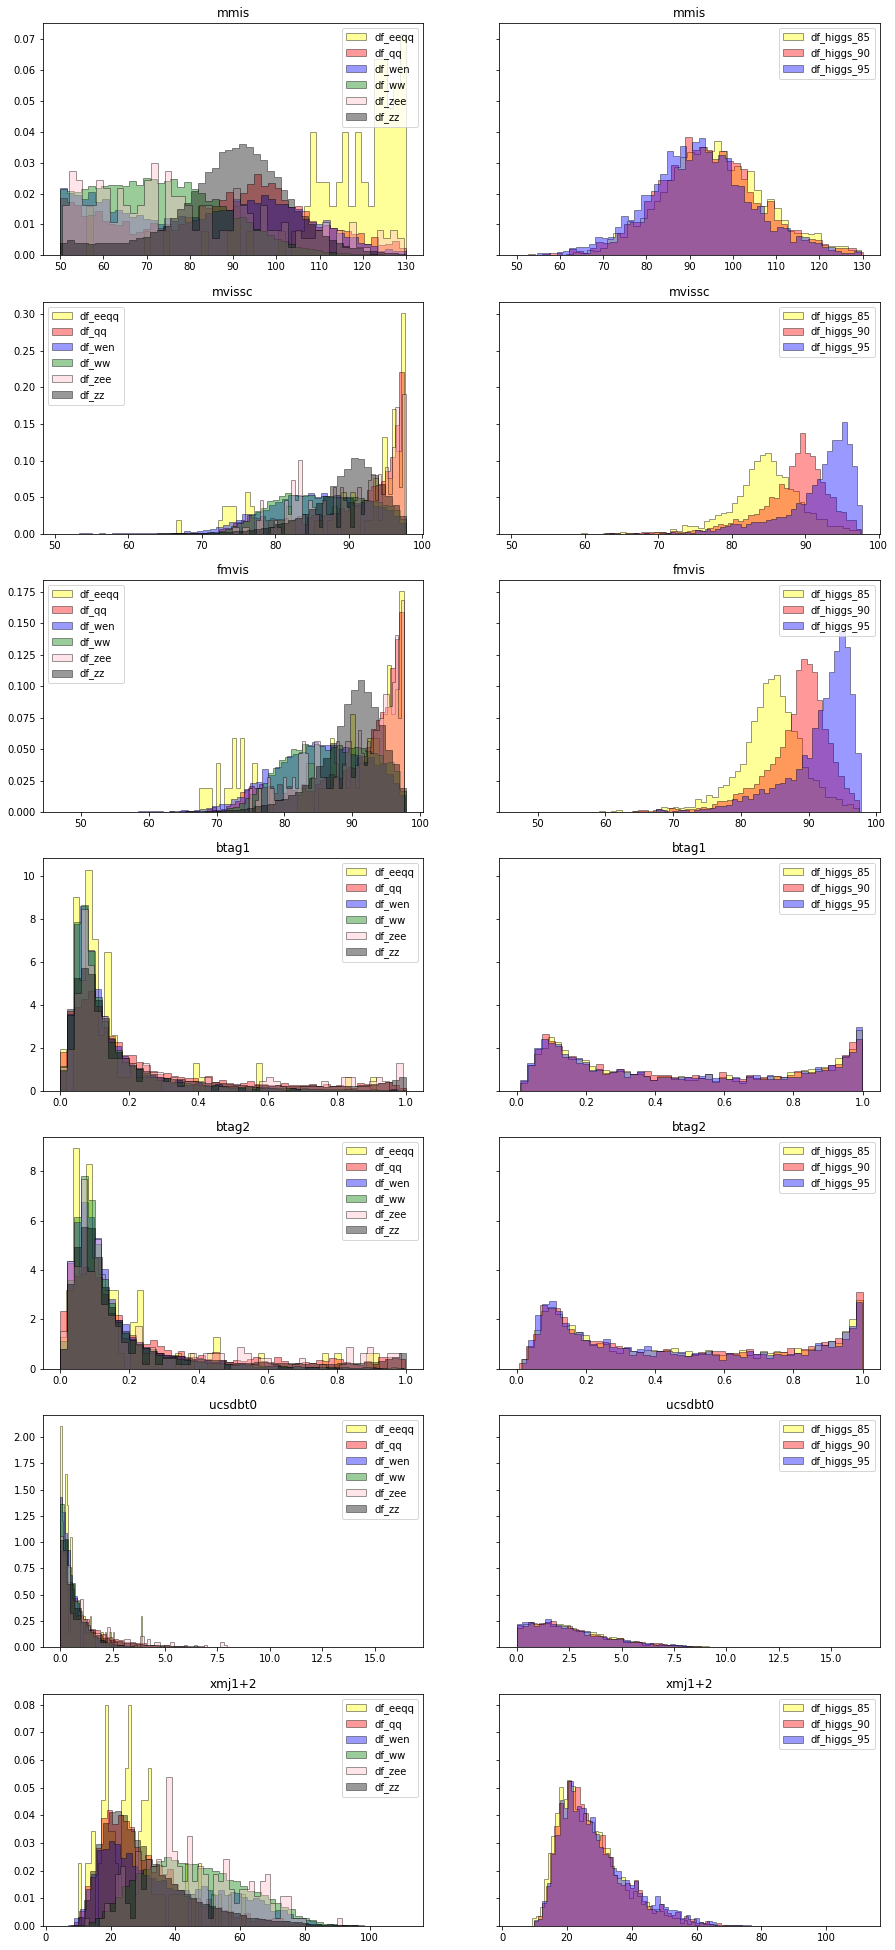

In [170]:
#check variables for each channel, try to make some sense out of them and try to see possible cuts
varlist = ['mmis', 'mvissc', 'fmvis', 'btag1', 'btag2', 'ucsdbt0','xmj1+2' ]
varlength = len(varlist)

colors = ['yellow', 'red', 'blue', 'green', 'pink', 'black']
bins = 50

#plot each variable on each row
#left background, right signal(s)

f, axs = plt.subplots(varlength, 2, sharey='row', sharex='row', figsize=(15,varlength*5))

for varname in varlist:
    index_var = varlist.index(varname)
    for dfname in df_names:
        index = df_names.index(dfname)
        
        #backgrounds
        if bkgsigdata[index] == 'bkg':
            #plot histograms (normalised area to 1)
            axs[index_var,0].hist((df_list[index])[varname], bins=bins, color=colors[index%len(colors)], ec="black", histtype="stepfilled", label=dfname, alpha=0.4, density=True)
            
            #calculate scale factor (xs) and plot histograms
            scalef = scalefactor(int_lumi, n_events(df_list[index]), dfxsec(dfname, df_names))
            weights = scalef*np.ones_like(np.linspace(1,n_events(df_list[index]), n_events(df_list[index])))
            #axs[index_var,0].hist(((df_list[index])[varname]), bins=bins, weights=weights, color=colors[index%len(colors)], ec="black", histtype="stepfilled", label=dfname, alpha=0.4)
        
        #signals
        if bkgsigdata[index] == 'sgn':
            #plot histograms (normalised area to 1)
            axs[index_var,1].hist((df_list[index])[varname], bins=bins, color=colors[index%len(colors)], ec="black", histtype="stepfilled", label=dfname, alpha=0.4, density=True)

            #calculate scale factor (xs) and plot histograms
            scalef = scalefactor(int_lumi, n_events(df_list[index]), dfxsec(dfname, df_names))
            weights = scalef*np.ones_like(np.linspace(1,n_events(df_list[index]), n_events(df_list[index])))
            #axs[index_var,1].hist(((df_list[index])[varname]), bins=bins, weights=weights, color=colors[index%len(colors)], ec="black", histtype="stepfilled", label=dfname, alpha=0.4)
    
    #plot title and legend for background (left) and signal (right)
    axs[index_var,0].set_title(varname)
    axs[index_var,0].legend(loc='best')
    axs[index_var,1].set_title(varname)
    axs[index_var,1].legend(loc='best')

plt.show()

In [ ]:
#to do: add signal + background and compare to data, see if it matches (normalising)